# Chapter 6a: 1D Operator formulation

Let's integrate our operator knowledge, exploring how to create simple operators for the 1D problems that we analyzes in the past. Let's start from the continuity equation, in 1D. This is extremely straightforward because $\nabla \cdot \mathbf{v} = 0$ becomes $\frac{\partial v_x}{\partial x}=0$. Let's therefore create the derivative operator in 1D.

We already discovered in the previous experiences that derivatives can be done forward, backward or centered. Let's recall here what we did in the Experience 4.

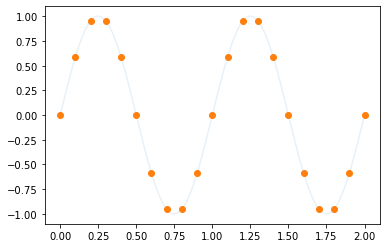

array([ 0.        ,  4.75528258,  1.81635632, -1.81635632, -4.75528258,
       -5.87785252, -4.75528258, -1.81635632,  1.81635632,  4.75528258,
        5.87785252,  4.75528258,  1.81635632, -1.81635632, -4.75528258,
       -5.87785252, -4.75528258, -1.81635632,  1.81635632,  4.75528258,
        0.        ])

In [11]:
import matplotlib.pyplot as plt
import numpy as np
tmax = 2.0 #ending time in seconds
tmin = 0.0 #starting time 
intervals = 20 #number of divisins on time interval
dt =(tmax-tmin) / intervals #time stepping
nt = intervals + 1
time = np.arange(nt) * dt

x=np.zeros(nt) #setting Initial position to zero

x[0:nt]=np.sin(2*np.pi*time[0:nt])
test= np.arange(1001)* (tmax-tmin) / 1000

plt.plot(test,np.sin(2*np.pi*test),'-',alpha=0.1)
plt.plot(time,x,'o');
plt.show()

dxdtForward = np.zeros(nt)
dxdtBackward = np.zeros(nt)
dxdtCentered = np.zeros(nt)

dxdtForward[0:nt-1] = (x[1:nt]-x[0:nt-1])/dt
dxdtBackward[1:nt] = (x[1:nt]-x[0:nt-1])/dt
dxdtCentered[1:nt-1] = 0.5 * (dxdtForward[1:nt-1] + dxdtBackward[1:nt-1])
dxdtCentered

Clearly for an oscillatory motion the continuity equation is not conserved. And that is normal, because in 1D the analytical solution of the continuity equation is very boring. Just an media traveling ad constant speed towards right or left. So, let's forget about the continuity equation and let's focus on how we could have calculated the derivative with an operator, a tensor, instead of the numpy call above. We have to find a matrix such that:

\begin{align}
A_{ij} \cdot x_i = \left(\frac{dx}{dt}\right)_j
\end{align}

where the indexes indicate the point in space where you are calcualting your derivative. Let's first create together the matrix equivalent to dxdtForward:



In [12]:
# first we create a matrix of the right size of zeros:
block=np.zeros((nt,nt),float)

# now we start exploring special numpy functions:

In [13]:
# identity:
A=np.identity(nt)
print('identity')
print(A)

identity
[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 

In [14]:
# diag()
A=np.diag(np.ones(nt)*2)
print('diag')
print(A)

diag
[[2. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 2. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 2. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 2. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 2. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 2. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 2. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 2. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 2. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 2. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 2. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 2. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 2. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 2. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 2. 0. 0. 0. 0. 0. 0.]
 [0. 

In [15]:
# shifted diag()
A=np.diag(np.ones(nt)*3,2)
print('shifted diag')
print(A)

shifted diag
[[0. 0. 3. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 3. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 3. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 3. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 3. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 3. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 3. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 3. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 3. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 3. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 3. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 3. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 3. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 3. 0

In [16]:
# kron()
print(np.ones((3,3)))
print('times')
print(np.identity(3)*4)
print('makes')
A=np.kron(np.ones((3,3)),np.identity(3)*4)
print(A)
print(np.shape(A))
print('kron is a controlled combination of matrices')

B=np.kron(np.identity(3)*4, np.ones((3,3)))
print(B)

[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]
times
[[4. 0. 0.]
 [0. 4. 0.]
 [0. 0. 4.]]
makes
[[4. 0. 0. 4. 0. 0. 4. 0. 0.]
 [0. 4. 0. 0. 4. 0. 0. 4. 0.]
 [0. 0. 4. 0. 0. 4. 0. 0. 4.]
 [4. 0. 0. 4. 0. 0. 4. 0. 0.]
 [0. 4. 0. 0. 4. 0. 0. 4. 0.]
 [0. 0. 4. 0. 0. 4. 0. 0. 4.]
 [4. 0. 0. 4. 0. 0. 4. 0. 0.]
 [0. 4. 0. 0. 4. 0. 0. 4. 0.]
 [0. 0. 4. 0. 0. 4. 0. 0. 4.]]
(9, 9)
kron is a controlled combination of matrices
[[4. 4. 4. 0. 0. 0. 0. 0. 0.]
 [4. 4. 4. 0. 0. 0. 0. 0. 0.]
 [4. 4. 4. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 4. 4. 4. 0. 0. 0.]
 [0. 0. 0. 4. 4. 4. 0. 0. 0.]
 [0. 0. 0. 4. 4. 4. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 4. 4. 4.]
 [0. 0. 0. 0. 0. 0. 4. 4. 4.]
 [0. 0. 0. 0. 0. 0. 4. 4. 4.]]


### Exercise 1

Using *np.kron()*, *np.ones()*, *np.zeros()*, etc Create a matrix made of 6x6 blocks, each of 3x3 matrix of 0,1,2. You choose the shape of the 3x3 matrix, the coolest you can come up. 

[[1. 2. 0.]
 [2. 1. 2.]
 [0. 2. 1.]]
[[1. 1.]
 [0. 1.]]
[[1. 1. 2. 2. 0. 0.]
 [0. 1. 0. 2. 0. 0.]
 [2. 2. 1. 1. 2. 2.]
 [0. 2. 0. 1. 0. 2.]
 [0. 0. 2. 2. 1. 1.]
 [0. 0. 0. 2. 0. 1.]]


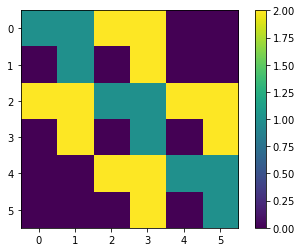

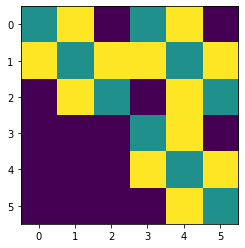

In [17]:
# here write your solution
size = 3
a = np.zeros((size, size), float)
a = np.diag(np.ones(size)) + np.diag(np.ones(size-1)*2,1) + np.diag(np.ones(size-1)*2,-1) + np.diag(np.zeros(size-2), 2) + np.diag(np.zeros(size-2), -2)
print(a)

size2 = 2
b = np.zeros((size2, size2), float)
b = np.diag(np.ones(size2)) + np.diag(np.ones(size2-1), 1) + np.diag(np.zeros(size2-1), -1)
print(b)

c = np.kron(a, b)
print(c)
d = np.kron(b,a)
plt.imshow(c)
plt.colorbar()
plt.show()
plt.imshow(d)

Since dxdtForwardOp is simply 1/dt for the difference between the next and the present value of x, then it is made of two diagonals next to each other, one to the right and the other on the main diagonal.

In [18]:
dxdtForwardOp = -1/dt*np.diag(np.ones(nt)) + 1/dt*np.diag(np.ones(nt-1),1)
print(dxdtForwardOp)

[[-10.  10.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.]
 [  0. -10.  10.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.]
 [  0.   0. -10.  10.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0. -10.  10.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0. -10.  10.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0. -10.  10.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0. -10.  10.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0. -10.  10.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0. -10.  10.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.]
 [  0.   0

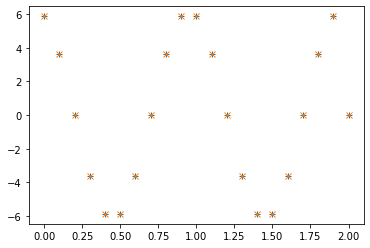

[-8.88178420e-16  8.88178420e-16  0.00000000e+00 -8.88178420e-16
  8.88178420e-16  0.00000000e+00 -4.44089210e-16  6.66133815e-16
  0.00000000e+00  0.00000000e+00  0.00000000e+00 -1.33226763e-15
  6.66133815e-16  0.00000000e+00  0.00000000e+00  8.88178420e-16
  0.00000000e+00  4.44089210e-16 -8.88178420e-16  8.88178420e-16
 -4.89858720e-15]


In [19]:
# let's see if it works!
dxdtForward[0:nt-1] = (x[1:nt]-x[0:nt-1])/dt



dxdtForward2 = np.zeros(nt)
dxdtForward2= dxdtForwardOp.dot(x)

plt.plot(time,dxdtForward,'+');
plt.plot(time,dxdtForward2,'x');
plt.show()

print(dxdtForward-dxdtForward2)
# PERFECT!

A more careful look at what we created should highlight that the solution was not perfect. One point is miscalculated. The last one. This is normal, because we need the next number to calculate the derivative. So, out of nt values for x, we can calculate only nt-1 values of the derivative, using this first order approximation. But that is ok. Just we understand that the operator should go from nt to nt-1, so it should not be a squared matrix but a rectangular one, with dimensions $nt * (nt-1)$

### Exercise 2
Create the other two matrix operators, the backward and centered ones 

[[ 10.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.]
 [-10.  10.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.]
 [  0. -10.  10.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.]
 [  0.   0. -10.  10.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0. -10.  10.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0. -10.  10.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0. -10.  10.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0. -10.  10.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0. -10.  10.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.]
 [  0.   0

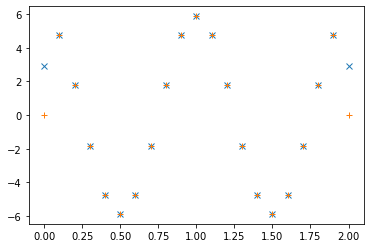

[-2.93892626e+00  0.00000000e+00  4.44089210e-16 -4.44089210e-16
  0.00000000e+00  8.88178420e-16  0.00000000e+00  0.00000000e+00
  4.44089210e-16 -8.88178420e-16  0.00000000e+00  0.00000000e+00
 -4.44089210e-16  4.44089210e-16  0.00000000e+00  8.88178420e-16
  0.00000000e+00  2.22044605e-16 -2.22044605e-16  0.00000000e+00
 -2.93892626e+00]


In [20]:
# here write your solution
dxdtBackwardOp = -1/dt*np.diag(np.ones(nt-1), -1) + 1/dt*np.diag(np.ones(nt)) 
print(dxdtBackwardOp)

dxdtCenteredOp = -.5/dt*np.diag(np.ones(nt-1),-1) + .5/dt*np.diag(np.ones(nt-1),1)


print(dxdtCenteredOp)
dxdtCentered[1:nt-1] = 0.5 * (dxdtForward[1:nt-1] + dxdtBackward[1:nt-1])
dxdtCenter2 = dxdtCenteredOp.dot(x)
plt.plot(time, dxdtCenter2, "x")
plt.plot(time,dxdtCentered,'+');
plt.show()

print(dxdtCentered-dxdtCenter2)

Let's now calculate the second derivative. We remember the nicely centerd formulation from the kinematic experience.

[[-200.  100.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
     0.    0.    0.    0.    0.    0.    0.    0.    0.]
 [ 100. -200.  100.    0.    0.    0.    0.    0.    0.    0.    0.    0.
     0.    0.    0.    0.    0.    0.    0.    0.    0.]
 [   0.  100. -200.  100.    0.    0.    0.    0.    0.    0.    0.    0.
     0.    0.    0.    0.    0.    0.    0.    0.    0.]
 [   0.    0.  100. -200.  100.    0.    0.    0.    0.    0.    0.    0.
     0.    0.    0.    0.    0.    0.    0.    0.    0.]
 [   0.    0.    0.  100. -200.  100.    0.    0.    0.    0.    0.    0.
     0.    0.    0.    0.    0.    0.    0.    0.    0.]
 [   0.    0.    0.    0.  100. -200.  100.    0.    0.    0.    0.    0.
     0.    0.    0.    0.    0.    0.    0.    0.    0.]
 [   0.    0.    0.    0.    0.  100. -200.  100.    0.    0.    0.    0.
     0.    0.    0.    0.    0.    0.    0.    0.    0.]
 [   0.    0.    0.    0.    0.    0.  100. -200.  100.    0.    0.    0.
     0.  

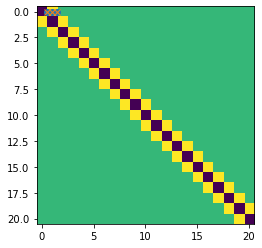

In [21]:
d2xdt2 = ( x[0:nt-2] - 2*x[1:nt-1] + x[2:nt] ) / dt**2
plt.plot(time[1:-1],d2xdt2,'o');
#where you see that now it has dimensions nt-2

d2xdt2Op = (np.diag(np.ones(nt-1),1) - 2*np.diag(np.ones(nt)) + np.diag(np.ones(nt-1), -1))/ dt**2
print(d2xdt2Op)
d2xdt2_2 = d2xdt2Op.dot(x)

plt.plot(time, d2xdt2_2, 'x')
plt.imshow(d2xdt2Op)

### Exercise 3
Create directly this operator, d2xdt2

In [22]:
# write here your solution

Let's do now something more interesting. Let's create the second operator by multiplying the operator derivative in one 1D by itself. Clearly, we need to be careful to the dimensions (reduction of one for each derivative). Other than that, we just have to repeat the work twice. Let's what happens if I use only the centered version of the 1D operators.


[[-25.   0.  25.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.]
 [  0. -50.   0.  25.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.]
 [ 25.   0. -50.   0.  25.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.]
 [  0.  25.   0. -50.   0.  25.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.  25.   0. -50.   0.  25.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.  25.   0. -50.   0.  25.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.  25.   0. -50.   0.  25.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.  25.   0. -50.   0.  25.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.  25.   0. -50.   0.  25.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.]
 [  0.   0

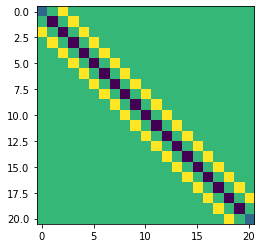

In [23]:
# first I create the centered operator like before
dxdtCenteredOp = -1/2/dt*np.diag(np.ones(nt-1),-1) + 1/2/dt*np.diag(np.ones(nt-1),1)
# and then a multiply it by itself:
d2xdt2OpCentered = dxdtCenteredOp.dot(dxdtCenteredOp)
print(d2xdt2OpCentered)
plt.imshow(d2xdt2OpCentered)

Which is different from the operator that we just created directly. How can this be??

Do you remember when introducing these derivatives in kinematics, we said that this kind of operator is dispersive. Too dispersive! In fact, although the results look similar (try it!) it is not the same, and smooths the function a bit.

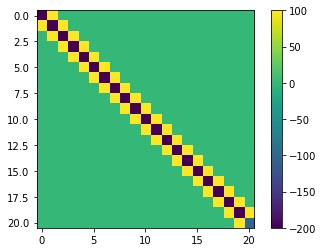

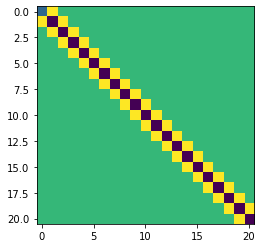

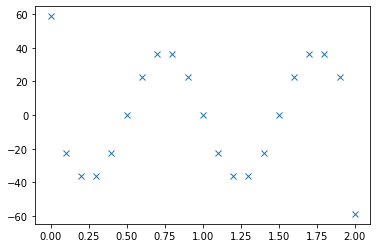

In [24]:
#compare here the two results, with the operator that we built directly 
#and with the operator from the product of the two

dx2dt2_new = dxdtForwardOp.dot(dxdtBackwardOp)
dx2dt2_new2 = dxdtBackwardOp.dot(dxdtForwardOp)

plt.imshow(dx2dt2_new)
plt.colorbar()
plt.show()
plt.imshow(dx2dt2_new2)
plt.show()
plt.plot(time, dx2dt2_new2.dot(x), 'x')

So, how do we create the correct (best!) operator? The trick is to use the forward and the backward. Which seems a paradox because each one was less correct than the centered one. But the poins is that they were biased, but not dispersive, and the two biases disappear when multypling one with the other! 

### Exercise 4
Create now the operator d2xdt2, by multypling either the forward and the backward or the backward and the forward. Does the result change? And compare how it operates with the best estiamate 
d2xdt2 = ( x[0:nt-2] - 2*x[1:nt-1] + x[2:nt] ) / dt**2


In [25]:
#here write your solution






## Sparse operators

Let's address now a last problem, which is actually of minor importance in 1D but fundamental in 2D. Sparse and dense operators. The problem is simply that the matrix above, is almost entire made by zeros. So, we are filling up the memory of our computers of zeros. What a waste of memory! And what a waste of computing time at multypling all these zeros for x or for other zeros (when multypling one operator for another). 

Computer scientists figured out long time ago that there had to be a better way. They invented therefore sparse matrices. They can be easily studies from scipy or numpy sparse. But quickly said here, sparse matrices are written in the computer not as the list of values, but as the list of non-zero values, as (i,j,value) where i and j are the coordinates of the non-zero value. 

Of the many sparse arrays that exist in Python, the CSR format (Compressed Sparse Column format) is specially suitable for fast matrix vector products. Since all our matrix come from some combinations of diagonal matrices, we can combine them into a CSR format. Let's see an example for the matrices that we created earlier. 

In [26]:
import scipy.sparse as sparse

In [27]:
# We start from a diagonal sparse matrix:  
a=sparse.dia_matrix((np.ones(nt)*3,0), shape=(nt,nt) ).tocsr()
print(a)

  (0, 0)	3.0
  (1, 1)	3.0
  (2, 2)	3.0
  (3, 3)	3.0
  (4, 4)	3.0
  (5, 5)	3.0
  (6, 6)	3.0
  (7, 7)	3.0
  (8, 8)	3.0
  (9, 9)	3.0
  (10, 10)	3.0
  (11, 11)	3.0
  (12, 12)	3.0
  (13, 13)	3.0
  (14, 14)	3.0
  (15, 15)	3.0
  (16, 16)	3.0
  (17, 17)	3.0
  (18, 18)	3.0
  (19, 19)	3.0
  (20, 20)	3.0


In [28]:
# the zero is the offset. Let's play with it a bit:
a=sparse.dia_matrix((np.ones(nt)*5,5), shape=(nt,nt) ).tocsr()
print(a)

  (0, 5)	5.0
  (1, 6)	5.0
  (2, 7)	5.0
  (3, 8)	5.0
  (4, 9)	5.0
  (5, 10)	5.0
  (6, 11)	5.0
  (7, 12)	5.0
  (8, 13)	5.0
  (9, 14)	5.0
  (10, 15)	5.0
  (11, 16)	5.0
  (12, 17)	5.0
  (13, 18)	5.0
  (14, 19)	5.0
  (15, 20)	5.0


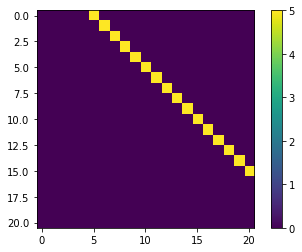

In [29]:
# you can see that the representation is not the one of before. 
# what if we want to visualize it as a normal matrix? We can always change into a standard matrix and plot it.
a2=a.toarray()
plt.imshow(a2)
plt.colorbar()

In [30]:
# products are just the same:
y=a.dot(x)
y2=a2.dot(x)
print(y)
print(y2)

[ 6.12323400e-16 -2.93892626e+00 -4.75528258e+00 -4.75528258e+00
 -2.93892626e+00 -1.22464680e-15  2.93892626e+00  4.75528258e+00
  4.75528258e+00  2.93892626e+00  1.83697020e-15 -2.93892626e+00
 -4.75528258e+00 -4.75528258e+00 -2.93892626e+00 -2.44929360e-15
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00]
[ 6.12323400e-16 -2.93892626e+00 -4.75528258e+00 -4.75528258e+00
 -2.93892626e+00 -1.22464680e-15  2.93892626e+00  4.75528258e+00
  4.75528258e+00  2.93892626e+00  1.83697020e-15 -2.93892626e+00
 -4.75528258e+00 -4.75528258e+00 -2.93892626e+00 -2.44929360e-15
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00]


### Exercise 5

Create now the operators dxdtcentered and dxdt2 using sparse matrices. You can also try to use the matrix product (using backward and forward) to build the second derivative. Check that the solution is correct either by comparing the matrix with .toarray or mulutplying it for a test x vector.

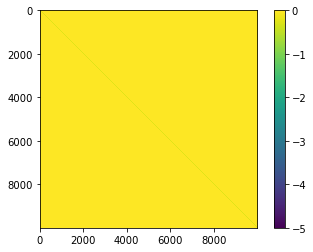

In [54]:
# write here your solution

#nt = 10000
dxdtcenteredSparse = -1/2/dt*sparse.dia_matrix((np.ones(nt),-1), shape=(nt,nt)).tocsr()+ -1/2/dt*sparse.dia_matrix((np.ones(nt), 1), shape=(nt,nt)).tocsr()
test = dxdtcenteredSparse.toarray()
plt.imshow(test)
plt.colorbar()
plt.show()

dxdtBackwardOp = -1/dt*np.diag(np.ones(nt-1), -1) + 1/dt*np.diag(np.ones(nt))
dxdtForwardOp = -1/dt*np.diag(np.ones(nt)) + 1/dt*np.diag(np.ones(nt-1),1)

BackwardOpSparse = -1/dt*sparse.dia_matrix((np.ones(nt), -1), shape=(nt,nt)).tocsr() + 1/dt*sparse.dia_matrix((np.ones(nt),0), shape=(nt,nt)).tocsr()
ForwardOpSparse = -1/dt*sparse.dia_matrix((np.ones(nt), 0), shape=(nt,nt)).tocsr() + 1/dt*sparse.dia_matrix((np.ones(nt), 1), shape=(nt,nt)).tocsr()
dxdt2Sparse = BackwardOpSparse.dot(ForwardOpSparse)


### Exercise 6

Compare the speed (using %timeit) to multiply one matrix operator and one vector, and two matrix operators, testing size of x varying among 10, 100, 1000, 10000. Plot the result in log10 to see the linear trend.

In [55]:
# write here your solution
%timeit BackwardOpSparse.dot(ForwardOpSparse)
%timeit ForwardOpSparse.dot(BackwardOpSparse)
%timeit dxdtBackwardOp.dot(dxdtForwardOp)
%timeit dxdtForwardOp.dot(dxdtBackwardOp)







719 µs ± 36.5 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
744 µs ± 15.3 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
40 s ± 1.32 s per loop (mean ± std. dev. of 7 runs, 1 loop each)
28 s ± 2.28 s per loop (mean ± std. dev. of 7 runs, 1 loop each)
